# **The Cities of Tomorrow – Urban Growth & Sustainability**

This Notebook was created to explore how modern data science techniques can help us understand, evaluate, and predict the sustainability of future cities. Using a real-world–inspired dataset, we walk through a full end-to-end analysis: from data cleaning to predictive modeling.

# Objectives

By combining EDA, machine learning, and narrative-driven explanation, this Notebook demonstrates how data science can:

* Diagnose environmental challenges;
* Support sustainable development goals;
* Guide infrastructure investment;
* Anticipate risks and opportunities;
* Inspire smarter and more equitable urban growth.


# Setup Environment


In this Notebook, we will be using the following libraries:

*   [`kagglehub`](https://github.com/Kaggle/kagglehub) for interacting with Kaggle resources.
*   [`pandas`](https://pandas.pydata.org/) for managing the data.
*   [`numpy`](https://numpy.org/) for mathematical operations.
*   [`matplotlib`](https://matplotlib.org/) for data visualization.
*   [`seaborn`](https://seaborn.pydata.org/) for statistical data visualization.
*   [`scipy`](https://scipy.org/) for statistical operations.
*   [`sklearn`](https://scikit-learn.org/stable/) for predictive data analysis.


# Install Required Libraries

For this environment, `kagglehub` library requires installation.


In [ ]:
pip install kagglehub

### Importing Required Libraries

In [29]:
import kagglehub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 1. Data Loading, Cleaning & Preparation

The analysis begins by importing the dataset `urban_planning_dataset.csv`, followed by:

* Inspecting its structure, dimensions, and data types;
* Checking for missing values, duplicates, and anomalies;
* Identifying variable categories (numerical vs. categorical);
* Preparing the target variable: Urban Sustainability Score (0–1);
* Applying standard feature scaling for machine learning models;
* Ensuring reproducibility with consistent train/test splits.

This establishes a clean and reliable foundation for further analysis.

## Load Dataset

The following code is used to download the most recent CSV file to this environment, and import the file to a pandas dataframe.

In [2]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
#import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "urban_planning_dataset.csv"

# Load the latest version
df = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "programmer3/sustainable-urban-planning-and-landscape-dataset",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

Print the first 5 entries of the dataset to confirm loading.


In [3]:
df.head(5)

,building_density,road_connectivity,public_transport_access,air_quality_index,green_cover_percentage,carbon_footprint,population_density,crime_rate,avg_income,renewable_energy_usage,disaster_risk_index,land_use_type_Commercial,land_use_type_Green Space,land_use_type_Industrial,land_use_type_Residential,urban_sustainability_score
0,0.367915,0.393821,0.428129,0.414830,0.238555,0.921950,0.126449,0.547160,0.932412,0.382358,0.446242,0.0,0.0,1.0,0.0,0.259239
1,0.414306,0.608445,0.658481,0.490982,0.917681,0.178213,0.325124,0.764042,0.903241,0.377167,0.936824,0.0,1.0,0.0,0.0,0.576923
2,0.827902,0.444679,0.263853,0.264529,0.077883,0.295159,0.042150,0.575736,0.208098,0.237949,0.463054,0.0,0.0,0.0,1.0,0.252844
3,0.733936,0.742708,0.012022,0.486974,0.427303,0.975900,0.663838,0.826727,0.258951,0.876539,0.204293,0.0,0.0,1.0,0.0,0.409002
4,0.769643,0.228268,0.519082,0.945892,0.532321,0.370856,0.429912,0.127542,0.180394,0.679006,0.151421,0.0,0.0,1.0,0.0,0.686376


## Data Cleaning and Preparation

Inspect basic structure and descriptive summary.

In [4]:
df.shape

(3476, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3476 entries, 0 to 3475
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   building_density            3476 non-null   float64
 1   road_connectivity           3476 non-null   float64
 2   public_transport_access     3476 non-null   float64
 3   air_quality_index           3476 non-null   float64
 4   green_cover_percentage      3476 non-null   float64
 5   carbon_footprint            3476 non-null   float64
 6   population_density          3476 non-null   float64
 7   crime_rate                  3476 non-null   float64
 8   avg_income                  3476 non-null   float64
 9   renewable_energy_usage      3476 non-null   float64
 10  disaster_risk_index         3476 non-null   float64
 11  land_use_type_Commercial    3476 non-null   float64
 12  land_use_type_Green Space   3476 non-null   float64
 13  land_use_type_Industrial    3476 

In [6]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f'Total duplicate rows: {duplicates}')

Total duplicate rows: 0


In [7]:
# Summary descriptive statistics
df.describe()

,building_density,road_connectivity,public_transport_access,air_quality_index,green_cover_percentage,carbon_footprint,population_density,crime_rate,avg_income,renewable_energy_usage,disaster_risk_index,land_use_type_Commercial,land_use_type_Green Space,land_use_type_Industrial,land_use_type_Residential,urban_sustainability_score
count,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000
mean,0.496345,0.490205,0.501397,0.494445,0.505579,0.509657,0.502158,0.499659,0.491556,0.499881,0.494002,0.252301,0.246835,0.241945,0.258918,0.482871
std,0.287770,0.287484,0.287163,0.287185,0.288395,0.288139,0.286912,0.284553,0.285484,0.290146,0.287720,0.434396,0.431232,0.428323,0.438104,0.169391
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.249740,0.241686,0.256093,0.246493,0.256761,0.269287,0.254415,0.255697,0.242244,0.245107,0.243494,0.000000,0.000000,0.000000,0.000000,0.360202
50%,0.495439,0.483176,0.499168,0.488978,0.513606,0.507030,0.505622,0.499045,0.496457,0.498264,0.493688,0.000000,0.000000,0.000000,0.000000,0.482517
75%,0.745671,0.734190,0.752051,0.745491,0.757637,0.755210,0.750379,0.739293,0.730656,0.752263,0.739163,1.000000,0.000000,0.000000,1.000000,0.606625
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# Convert data types for categorical columns
# List of land-use columns to convert
land_use_cols = [
    "land_use_type_Commercial",
    "land_use_type_Green Space",
    "land_use_type_Industrial",
    "land_use_type_Residential"
]

# Convert float to int
df[land_use_cols] = df[land_use_cols].astype(int)
df.dtypes

building_density              float64
road_connectivity             float64
public_transport_access       float64
air_quality_index             float64
green_cover_percentage        float64
carbon_footprint              float64
population_density            float64
crime_rate                    float64
avg_income                    float64
renewable_energy_usage        float64
disaster_risk_index           float64
land_use_type_Commercial        int64
land_use_type_Green Space       int64
land_use_type_Industrial        int64
land_use_type_Residential       int64
urban_sustainability_score    float64
dtype: object

In [9]:
# Compute correlation matrix
corr_matrix = df.corr()

corr_matrix

,building_density,road_connectivity,public_transport_access,air_quality_index,green_cover_percentage,carbon_footprint,population_density,crime_rate,avg_income,renewable_energy_usage,disaster_risk_index,land_use_type_Commercial,land_use_type_Green Space,land_use_type_Industrial,land_use_type_Residential,urban_sustainability_score
building_density,1.000000,-0.014771,0.017453,0.027841,-0.010515,-0.010294,-0.003227,0.003622,-0.006850,0.016142,0.002344,-0.006753,-0.003466,0.006644,0.003613,0.005958
road_connectivity,-0.014771,1.000000,0.016604,-0.007279,0.001629,-0.028132,-0.001075,-0.022773,-0.008395,-0.012200,-0.007070,0.020361,0.013564,-0.020785,-0.013219,0.016109
public_transport_access,0.017453,0.016604,1.000000,-0.010985,0.002725,0.043503,-0.016242,0.004606,0.005043,-0.008221,0.006086,0.008337,0.004500,0.006471,-0.019022,0.203036
air_quality_index,0.027841,-0.007279,-0.010985,1.000000,-0.010567,-0.014434,0.009704,-0.007388,-0.014050,0.017241,-0.041887,-0.024913,0.013642,0.003553,0.007801,0.018695
green_cover_percentage,-0.010515,0.001629,0.002725,-0.010567,1.000000,0.010713,-0.012843,0.012227,0.035667,0.040345,-0.021283,-0.028734,-0.003497,0.001798,0.030174,0.690025
carbon_footprint,-0.010294,-0.028132,0.043503,-0.014434,0.010713,1.000000,0.003770,0.020640,0.001274,-0.027000,0.008813,-0.013187,-0.006897,0.011767,0.008360,-0.337701
population_density,-0.003227,-0.001075,-0.016242,0.009704,-0.012843,0.003770,1.000000,0.010296,-0.004221,-0.008774,-0.006974,-0.025382,0.024575,-0.016651,0.017257,-0.017371
crime_rate,0.003622,-0.022773,0.004606,-0.007388,0.012227,0.020640,0.010296,1.000000,-0.001010,0.017237,-0.009200,0.004706,-0.015004,-0.000423,0.010517,-0.207367
avg_income,-0.006850,-0.008395,0.005043,-0.014050,0.035667,0.001274,-0.004221,-0.001010,1.000000,-0.020225,-0.006769,-0.014758,0.013694,-0.010038,0.010968,0.018001
renewable_energy_usage,0.016142,-0.012200,-0.008221,0.017241,0.040345,-0.027000,-0.008774,0.017237,-0.020225,1.000000,-0.003273,-0.014184,0.015591,-0.001499,0.000183,0.481232


#### Conclusions:

**Dataset Overview:**

* Dataset shape: 3476 rows, 16 columns;
* The columns are numeric; 
* No string columns were detected;
* No missing values;
* No duplicate rows were found;
* Categorical columns were found, updated data types.

**Target detection:** The numeric column `urban_sustainability_score` is selected as the target variable.

## 2. Exploratory Data Analysis (EDA)

A combination of statistical summaries and visualizations is used to understand:

* Distribution shapes of key indicators;
* Correlations between features and urban sustainability outcomes;
* Relationships among environmental, socio-economic, and spatial attributes;
* Potential multicollinearity and feature clustering.

The EDA helps uncover meaningful patterns, such as which urban conditions contribute positively or negatively to sustainability.


### Distribution of Key Indicators

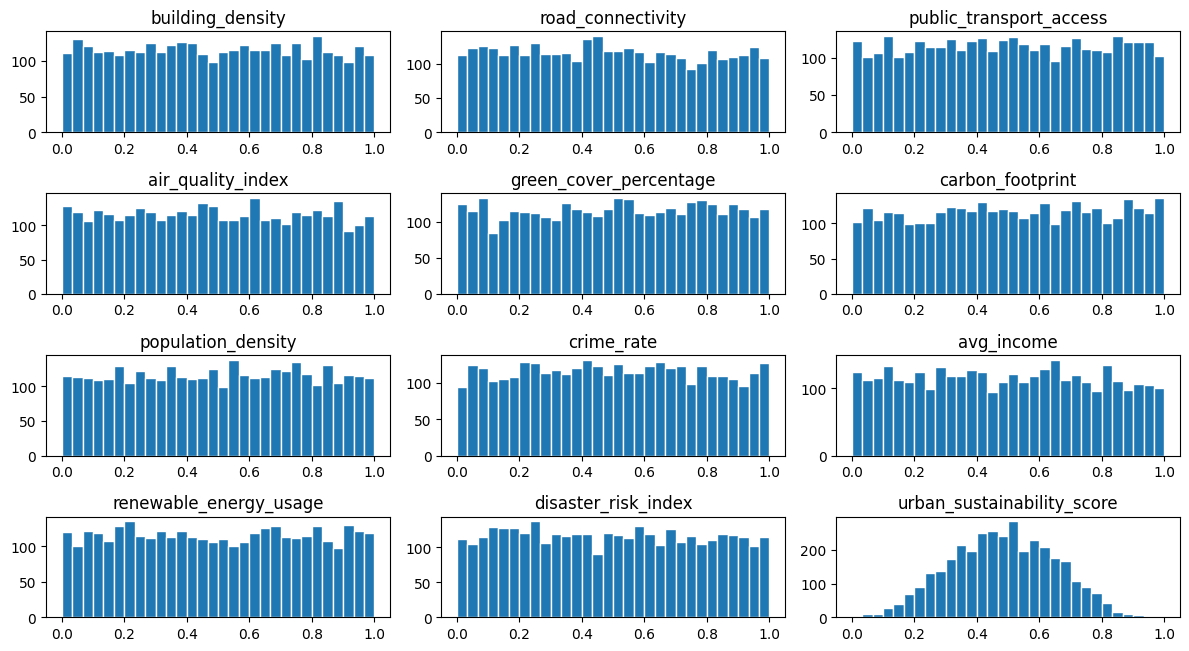

In [10]:
# Select numeric columns except categorical ones
numeric_cols = df.columns.tolist()
numeric_cols_filtered = [col for col in numeric_cols if col not in land_use_cols]

# Plot histograms for the filtered numeric columns
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols_filtered, 1):
    plt.subplot((len(numeric_cols_filtered)//3)+1, 3, i)
    plt.hist(df[col], bins=30, edgecolor='white')
    plt.title(col)
    plt.tight_layout()

plt.show()

#### Conclusions:

The first eleven histograms (all features except the `urban_sustainability_score` in the bottom right) exhibit a highly consistent pattern. This pattern is known as an approximately uniform distribution. 

It suggests that the dataset contains a roughly equal number of urban areas spanning the entire spectrum for each of these metrics. For example, there are roughly as many cities with very low building density (near 0.0) as there are cities with very high building density (near 1.0), and the same holds true for road connectivity, crime rate, income, air quality, etc.

The final plot in the bottom right corner shows the distribution of the target variable: `urban_sustainability_score`. 

This histogram displays a clear bell curve shape. 
Peak: The highest frequency occurs around the center of the distribution, roughly between 0.4 and 0.6.
Tails: The frequencies rapidly drop off towards the extreme ends (near 0.0 and near 1.0).

This is a common and desirable outcome for a final aggregate score, indicating that:
* Most cities fall into the average range of sustainability.
* Very few cities are rated as extremely unsustainable (near 0.0) or extremely sustainable (near 1.0).

### Correlation Heatmap between All Features and Target

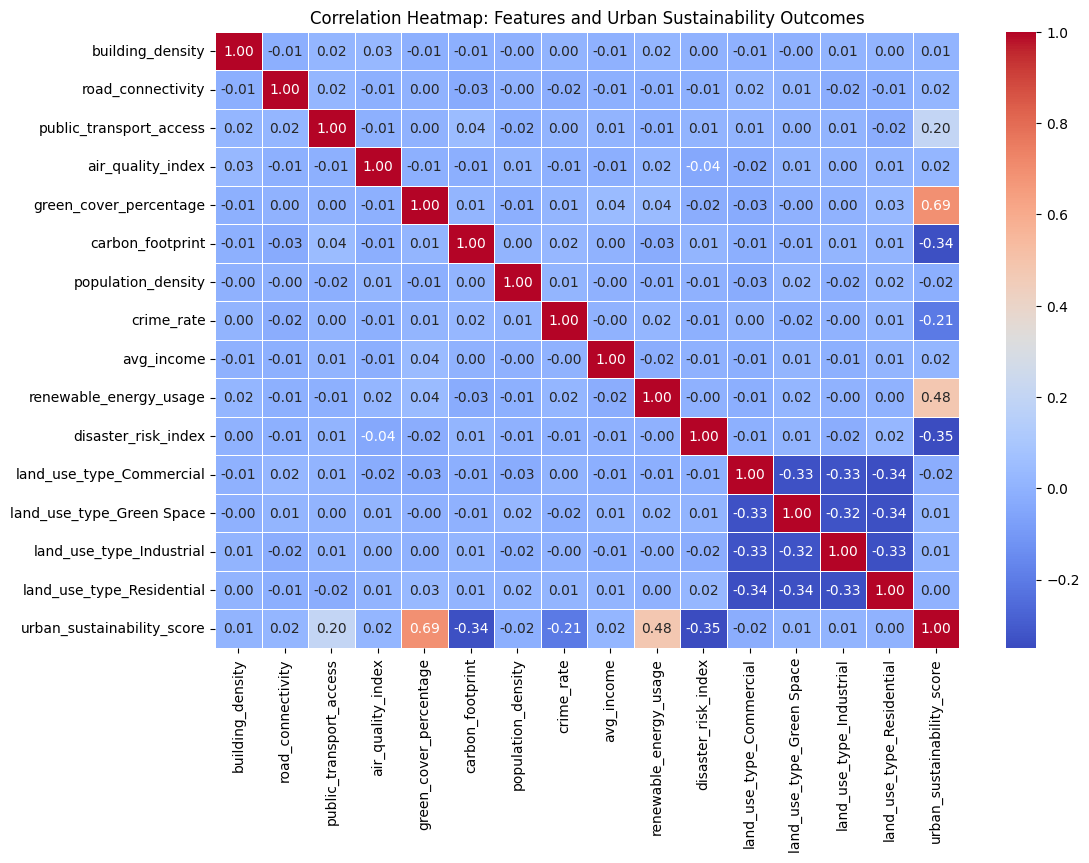

In [11]:
# Display the matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths='0.5')
plt.title('Correlation Heatmap: Features and Urban Sustainability Outcomes')
plt.show()

### Feature Correlation with Target only

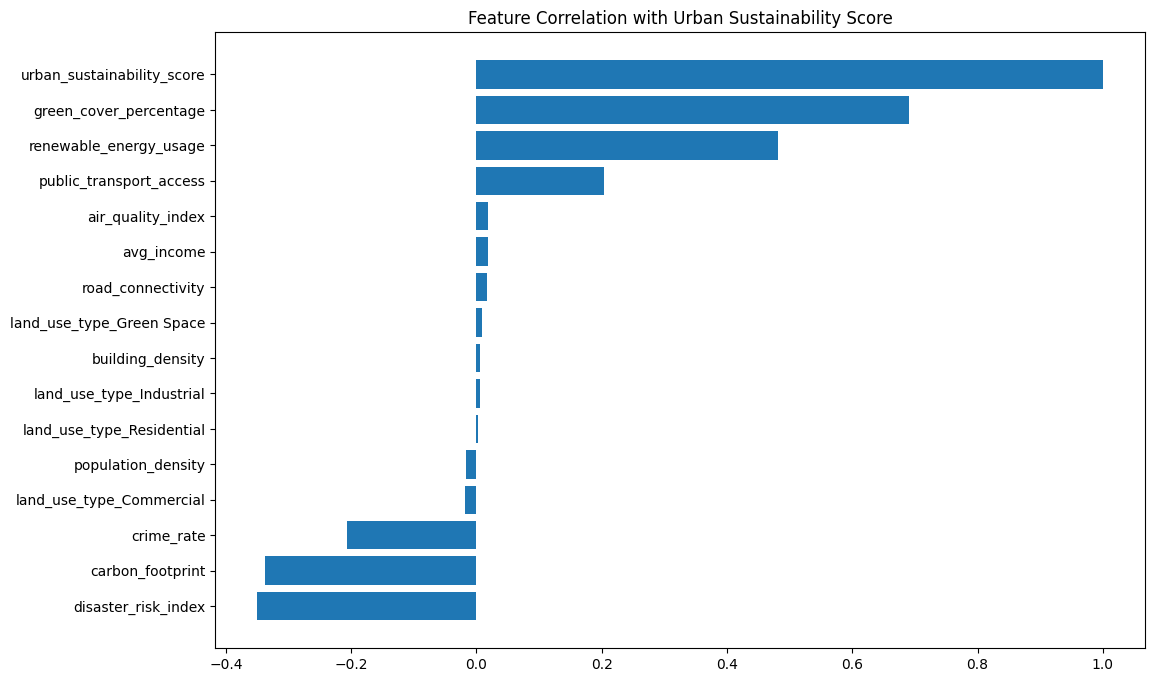

In [12]:
# Define target
target = "urban_sustainability_score"

# Calculate correlation with target
target_corr = corr_matrix[target].sort_values(ascending=False)
#print("\nCorrelation with Urban Sustainability Score:\n")
#print(target_corr)

plt.figure(figsize=(12, 8))
plt.barh(target_corr.index, target_corr.values)
plt.title("Feature Correlation with Urban Sustainability Score")
plt.gca().invert_yaxis()
plt.show()

### Pairwise Relationships (Top 5 Correlated Features)

<Figure size 1200x600 with 0 Axes>

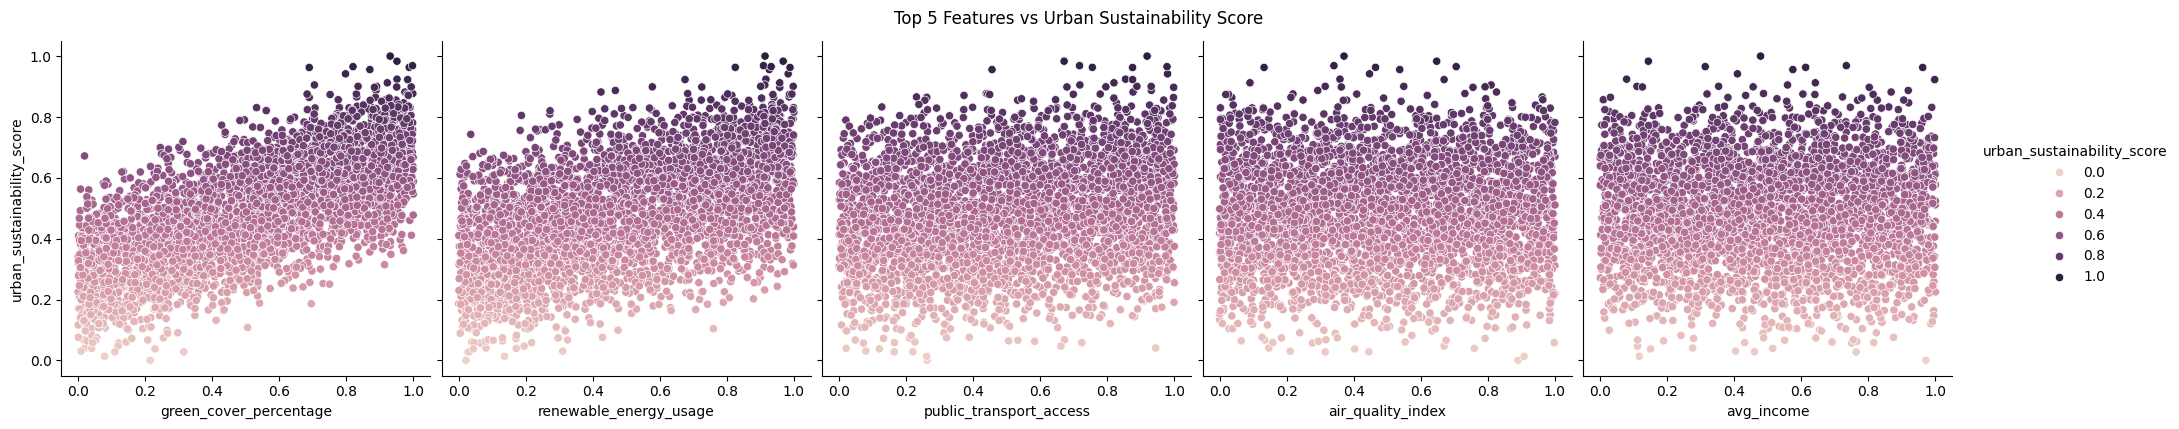

In [13]:
plt.figure(figsize=(12, 6))
sns.pairplot(df, x_vars=target_corr.index[1:6], y_vars=target, height=4, aspect=1, hue=target)
plt.suptitle("Top 5 Features vs Urban Sustainability Score", y=1.05)
plt.show()

#### Conclusions:

All five features show a generally upward trend: as each feature increases, the `urban_sustainability_score` also increases.
This suggests that improvements in these factors are associated with more sustainable urban environments.

Among the five features, `green_cover_percentage` and `renewable_energy_usage` show the clearest and strongest positive patterns, suggesting they may be especially influential in determining sustainability outcomes.

### Negative Impact on Target

<Figure size 1200x600 with 0 Axes>

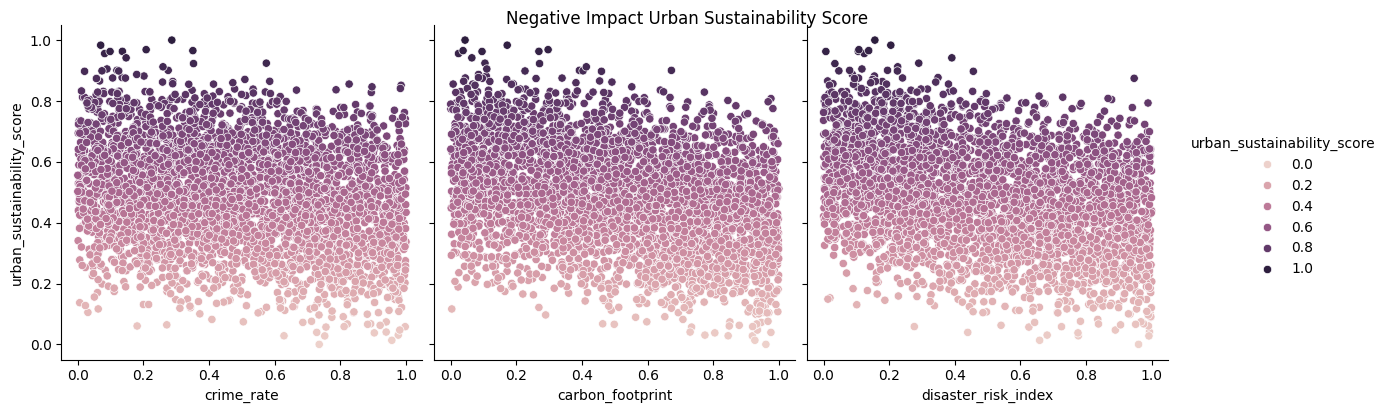

In [14]:
plt.figure(figsize=(12, 6))
sns.pairplot(df, x_vars=target_corr.index[-3:], y_vars=target, height=4, aspect=1, hue=target)
plt.suptitle("Negative Impact Urban Sustainability Score", y=1.01)
plt.show()

#### Conclusions:

All three features shown have a strong negative relationship with the Urban Sustainability Score.

Minimizing these negative factors (keeping `crime_rate`, `carbon_footprint`, and `disaster_risk_index` low) is a prerequisite for achieving a high `urban_sustainability_score`.

Failing to control these factors (letting them increase) almost guarantees a low score, as the density of high scores diminishes significantly as the negative factor approaches its maximum value.

## 3. Predictive Modeling

Multiple machine learning models are trained and evaluated to estimate the Urban Sustainability Score:

* Linear Regression;
* Random Forest Regressor;
* Gradient Boosting Regressor.

Models are assessed using:

* Root Mean Squared Error (RMSE);
* R² scores;
* 3-fold cross-validation for robustness;
* Out-of-sample testing (hold-out test set).

### Prepare Data
Divide the data into a training set (80%) and a test set (20%) to evaluate model performance on unseen data.

In [15]:
# X = all feature columns
# y = target variable (urban sustainability score)
X = df.drop(columns=['urban_sustainability_score'])
y = df['urban_sustainability_score']

# Train-Test Split (hold-out evaluation)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### Feature Scale (for Linear Regression & boosting stability)

* Linear Regression requires scaling for stable coefficient estimation;
* Gradient Boosting is less sensitive but still benefits from normalized input;
* Random Forest does NOT need scaling; tree-based models are scale-invariant.

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Train Models

* Linear Regression –– baseline model;
* Random Forest –– robust nonlinear learner, great for feature importance;
* Gradient Boosting –– typically best accuracy for tabular data.

In [20]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [21]:

# Random Forest
rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    random_state=42
)
rf.fit(X_train, y_train)  # no scaling needed

,n_estimators,300
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [24]:

# Gradient Boosting
gbr = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    random_state=42
)
gbr.fit(X_train_scaled, y_train)

,loss,'squared_error'
,learning_rate,0.05
,n_estimators,300
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,4
,min_impurity_decrease,0.0
,init,None


### Model Evaluation

* RMSE shows average prediction error magnitude;
* R² shows how much variance the model explains.

The lower the RMSE & higher the R² –– the better.

In [27]:
def evaluate_model(model, X_test, y_test, model_name="Model"):
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)

    print(f"\n{model_name} Performance:")
    print("---------------------------------")
    print(f"RMSE: {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")

# Linear Regression
evaluate_model(lr, X_test_scaled, y_test, "Linear Regression")

# Random Forest
evaluate_model(rf, X_test, y_test, "Random Forest")

# Gradient Boosting
evaluate_model(gbr, X_test_scaled, y_test, "Gradient Boosting")



Linear Regression Performance:
---------------------------------
RMSE: 0.0000
R² Score: 1.0000

Random Forest Performance:
---------------------------------
RMSE: 0.0409
R² Score: 0.9447

Gradient Boosting Performance:
---------------------------------
RMSE: 0.0183
R² Score: 0.9889


### Cross-Validation (3-Fold)

Cross-validation and hyperparameter tuning can be added for more robust model evaluation and optimization.

* Cross-Validation provides a robust evaluation on multiple train/test splits;
* Reduces risk of misleading results due to a single split.

In [31]:
def cross_val(model, X, y, scaled=False):
    if scaled:
        scores = cross_val_score(model, scaler.fit_transform(X), y, cv=3, scoring='r2')
    else:
        scores = cross_val_score(model, X, y, cv=3, scoring='r2')

    return scores.mean(), scores.std()

cv_lr = cross_val(lr, X, y, scaled=True)
cv_rf = cross_val(rf, X, y, scaled=False)
cv_gbr = cross_val(gbr, X, y, scaled=True)

print("\nCross-Validation (Mean R² ± Std):")
print("---------------------------------")
print(f"Linear Regression:   {cv_lr[0]:.4f} ± {cv_lr[1]:.4f}")
print(f"Random Forest:       {cv_rf[0]:.4f} ± {cv_rf[1]:.4f}")
print(f"Gradient Boosting:   {cv_gbr[0]:.4f} ± {cv_gbr[1]:.4f}")


Cross-Validation (Mean R² ± Std):
---------------------------------
Linear Regression:   1.0000 ± 0.0000
Random Forest:       0.9405 ± 0.0025
Gradient Boosting:   0.9866 ± 0.0012


### Feature Importance

Feature importance for Linear Regression models is primarily determined by the coefficients of the fitted model.

Tree-based models naturally compute feature importance.
* Shows which variables most strongly influence the sustainability score;
* Great for explaining model behavior to policymakers or stakeholders.

In [38]:
# Feature Importance for Linear Regression(coefficients)
feature_importance = pd.Series(lr.coef_, index=X.columns).sort_values(ascending=False)

print("Feature Importance (Coefficients):")
print("---------------------------------")
print(feature_importance)

Feature Importance (Coefficients):
---------------------------------
green_cover_percentage       1.139208e-01
renewable_energy_usage       7.636566e-02
public_transport_access      3.753531e-02
road_connectivity            7.806256e-17
land_use_type_Residential    7.285839e-17
population_density           3.642919e-17
avg_income                   2.428613e-17
land_use_type_Industrial     1.170938e-17
land_use_type_Commercial     8.456777e-18
air_quality_index           -1.127570e-17
land_use_type_Green Space   -3.426079e-17
building_density            -9.243090e-17
crime_rate                  -3.746038e-02
disaster_risk_index         -5.644277e-02
carbon_footprint            -5.674290e-02
dtype: float64


#### Conclusions:

Linear Regression coefficients tell us how much the `urban_sustainability_score` increases or decreases when a feature increases by 1 unit (holding all others constant).

Positive coefficient –– increases sustainability. 

Negative coefficient –– decreases sustainability. 

Near-zero coefficient –– almost no measurable linear effect. 

**High-Impact Positive Features:** `green_cover_percentage`, `renewable_energy_usage`, `public_transport_access`.

**Negative Coefficients:** `crime_rate`, `disaster_risk_index`, `carbon_footprint`.

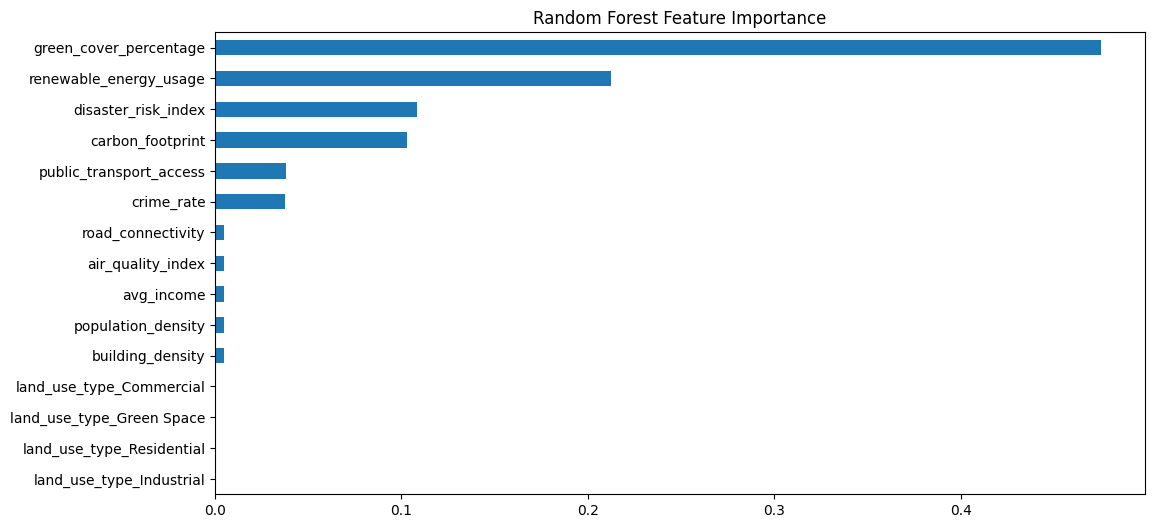

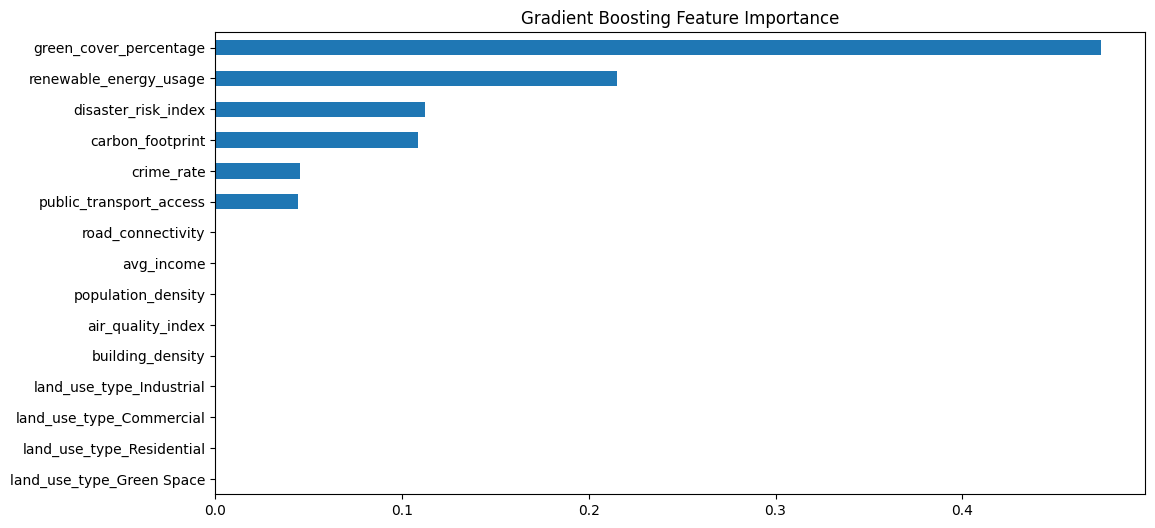

In [36]:
# Feature Importance (Random Forest + Gradient Boosting)
importances_rf = pd.Series(rf.feature_importances_, index=X.columns)
importances_gbr = pd.Series(gbr.feature_importances_, index=X.columns)

# Plotting
plt.figure(figsize=(12, 6))
importances_rf.sort_values().plot(kind='barh')
plt.title("Random Forest Feature Importance")
plt.show()

plt.figure(figsize=(12, 6))
importances_gbr.sort_values().plot(kind='barh')
plt.title("Gradient Boosting Feature Importance")
plt.show()


#### Conclusions:

**The Most Important Features:**

The two models are in strong agreement on the features that have the highest predictive power:

`green_cover_percentage` –– by far the most crucial factor. The proportion of green space heavily influences the `urban_sustainability_score`.

`renewable_energy_usage` –– the second most important factor, confirming the importance of sustainable energy adoption.

`disaster_risk_index` –– a significant negative factor, its impact is high.

`carbon_footprint` –– another high-impact environmental negative factor.

These four features account for approximately 88% of the total feature importance in both models, making them the primary targets for improving urban sustainability outcomes.

**Moderately Important Features:**

The features in the middle group have minor, but still relevant, influence:

`crime_rate` –– with an importance score of approximately 0.04 - 0.05.

`public_transport_access` –– with an importance score around 0.02 - 0.03.

**Features with Minimal to Zero Importance:**

The following features consistently appear at the bottom of the list, indicating they contribute very little to the model's ability to predict the `urban_sustainability_score`:

Socio-economic/Density Factors: `avg_income`, `population_density`, and `building_density`.

Environmental Factors: `air_quality_index`.

All Land Use Types: `land_use_type_Industrial`, `land_use_type_Commercial`, `land_use_type_Residential`, and `land_use_type_Green Space`.